## Ames Housing Data - An Iteration
Laura Roman
May 2018

### Exploratory Data Analyiss

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler,Normalizer

In [2]:
train_set = pd.read_csv('./data/train.csv')
hold_out_set = pd.read_csv('./data/test.csv')                       
houses = pd.DataFrame(train_set)

In [3]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
hold_out_set.shape

(879, 80)

In [5]:
houses.shape

(2051, 81)

In [6]:
#houses.isnull().sum()

In [7]:
houses.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
houses['Year Built'].value_counts().tail()

1911    1
1893    1
1885    1
1879    1
1872    1
Name: Year Built, dtype: int64

In [9]:
houses['Bldg Type'].value_counts() #will need to convert to numeric if we want to use this

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

In [10]:
houses.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [11]:
houses['Bldg Type'].value_counts() #will need to convert to numeric if we want to use this

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

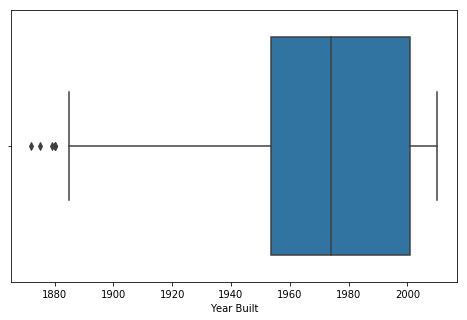

In [12]:
fig = plt.figure(figsize=(8,5))
sns.boxplot(houses['Year Built']);
#houses['Year Built'].plot(kind="box",vert=False)

Ames Housing Data for houses in Ames, Iowa the majority of which were build 1953-2010 and sold 2006-2010.

/Users/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


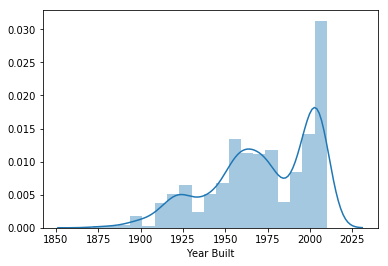

In [14]:
sns.distplot(houses['Year Built']);

In [15]:
houses['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [16]:
sns.set_style("darkgrid")

In [17]:
houses[houses['Neighborhood']=='Sawyer']['SalePrice'].mean()

137181.9099099099

In [18]:
nb = houses[['Neighborhood','SalePrice']]

In [19]:
nb_sp = nb.groupby('Neighborhood').mean().sort_values('SalePrice',ascending=False)

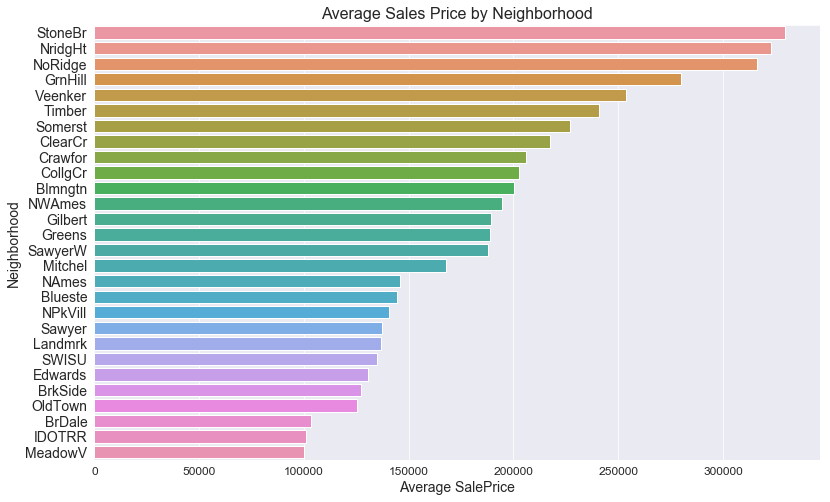

In [22]:
plt.figure(figsize=(13,8))
sns.barplot(y=nb_sp.index,x= nb_sp['SalePrice'],ci=None)
plt.title("Average Sales Price by Neighborhood",fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Neighborhood",fontsize=14)
plt.xlabel("Average SalePrice",fontsize=14);

Looks like Neighborhood maybe worthwhile factoring in. 
Will Need to ordinalize.

Text(0, 0.5, 'Sale Price')

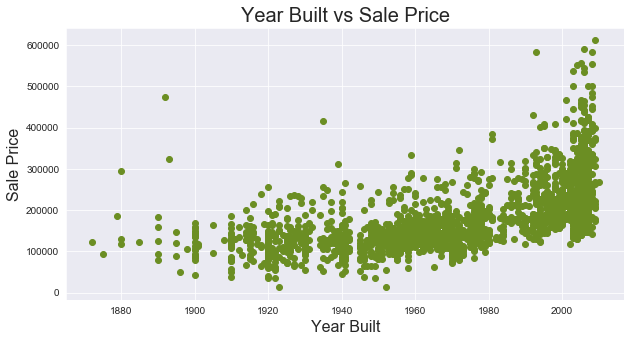

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.scatter(houses['Year Built'],houses['SalePrice'],label = ("Year Built","Sale Price"),color = "olivedrab")
plt.title("Year Built vs Sale Price",fontsize =20)
plt.xlabel("Year Built", fontsize = 16)
plt.ylabel("Sale Price",fontsize=16)

In [25]:
df_corr = pd.DataFrame(houses.corr()['SalePrice'].sort_values(ascending=False))

In [26]:
df_corr.rename(columns={"SalePrice":"Corr_w_SalePrice"},inplace=True)

In [27]:
df_corr.head()

,Corr_w_SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650270
Garage Cars,0.648220


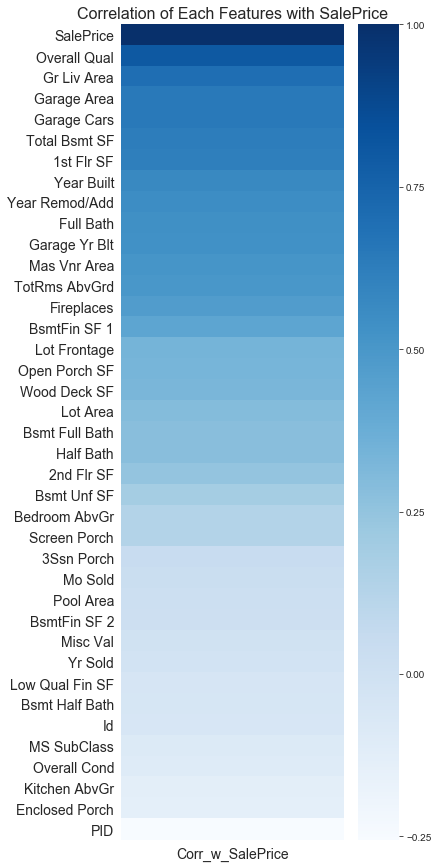

In [28]:
plt.figure(figsize=(5,15))
sns.heatmap(df_corr,cmap="Blues")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Correlation of Each Features with SalePrice",fontsize=16);

**Features that appear to be correlated with Saleprice:**

1. Overall Qual - scale of 1 to 10
2. Garage Area - need to scale
3. Garage Cars  - need to scale
4. Several SF measures - possibly need to scale? (these must be in thousands)
5. Year Built - need to scale (1950=0)
6. Year Remod/Add - need to scale (1872=0)
7. TotRms AbvGrd

Qualitative: 
[ADD]

In [71]:
houses['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [72]:
houses['Garage Area'].value_counts().head()

0.0      113
440.0     70
576.0     69
484.0     52
528.0     46
Name: Garage Area, dtype: int64

In [73]:
houses['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

In [74]:
houses['Year Remod/Add'].value_counts().sort_values(ascending=True).head()

1982    3
1981    6
1983    7
2010    8
1952    9
Name: Year Remod/Add, dtype: int64

In [75]:
houses['Year Remod/Add'].isna().sum()

0

### Data cleaning

In [76]:
from sklearn import preprocessing

#### For Total SF calcualtion: 

Extract all numeric columns

In [78]:
#Filter for numeric_features exept for ID, PID (because we don't need them), and SalePrice (because its what we are trying to predict)
numeric_features=list(train_set._get_numeric_data().drop(['Id','PID','SalePrice'],axis=1).columns)


In [79]:
houses[numeric_features].columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

1.Create Total SF feature

In [80]:
SF_list= list(filter(lambda k: 'SF' in k, numeric_features))
SF_list

['BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Wood Deck SF',
 'Open Porch SF']

In [81]:
#Basement SF measurements overlap, so we remove them
SF_list.remove('BsmtFin SF 1')
SF_list.remove('BsmtFin SF 2') 
SF_list.remove('Bsmt Unf SF')
#Low Qual Fin SF means: LowQualFinSF: Low quality finished square feet (all floors), and may be duplicative
# of 1st & 2nd Floor SF so we remove it as well
SF_list.remove('Low Qual Fin SF')

Note: Gr Liv Area (Above Ground Living Area is also duplicative, so its not added to the SF total)

In [82]:
SF_list

['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Wood Deck SF', 'Open Porch SF']

In [83]:
#Define a function to calculate total square footage from the 9 squre footage features
def total_square_feet(list_of_cols,df):
    tot=0
    for each in list_of_cols:
        tot += df[each]
    return tot

In [84]:
houses['Total_SF'] = total_square_feet(SF_list,houses)

In [85]:
houses[['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Wood Deck SF', 'Open Porch SF','Total_SF']].head(10)

,Total Bsmt SF,1st Flr SF,2nd Flr SF,Wood Deck SF,Open Porch SF,Total_SF
0,725.0,725,754,0,44,2248.0
1,913.0,913,1209,0,74,3109.0
2,1057.0,1057,0,0,52,2166.0
3,384.0,744,700,100,0,1928.0
4,676.0,831,614,0,59,2180.0
5,1517.0,1888,0,0,0,3405.0
6,547.0,1072,0,0,44,1663.0
7,1188.0,1188,0,0,0,2376.0
8,924.0,924,0,0,324,2172.0
9,1040.0,1040,1040,335,0,3455.0


/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


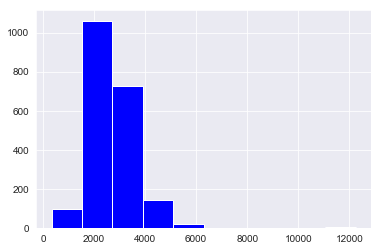

In [86]:
#Verify that all Total SF is within a reasonable range.
plt.hist(houses['Total_SF'], color='blue');

2. Ordinalize Neighborhoods

In [87]:
labels = houses['Neighborhood'].astype('category').cat.categories.tolist()
replace_map = {'Neighborhood' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [88]:
#replace country names with numerical values
houses.replace(replace_map,inplace=True)

In [89]:
houses['Neighborhood'].head()

0    23
1    24
2    16
3    27
4    24
Name: Neighborhood, dtype: int64

In [90]:
houses['Neighborhood'].isna().sum()

0

Normalize Data:


In [91]:
from sklearn import preprocessing

1. Overall Qual - scale of 1 to 10
2. Garage Area - need to scale
3. Garage Cars  - need to scale
4. Several SF measures - possibly need to scale? (these must be in thousands)
5. Year Built - need to scale
6. Year Remod/Add - need to scale (1872 =1)
7. TotRms AbvGrd

**Garage Area**<br>
Check and fill NaN before scaling:

In [92]:
houses[houses['Garage Area'].isna()]['Garage Area']

1712   NaN
Name: Garage Area, dtype: float64

In [93]:
houses['Garage Area'] = houses['Garage Area'].fillna(0)

In [94]:
houses['Garage Cars'] = houses['Garage Cars'].fillna(0)
houses['Total_SF'] = houses['Total_SF'].fillna(0)

In [95]:
X_ex = np.array(houses['Garage Area'])
norm_X_ex = preprocessing.normalize([X_ex])                                      

In [96]:
#Scale year built to min 1872=0
houses['Year Built'] = houses['Year Built'] -houses['Year Built'].min()

In [97]:
#Scale Year Remod/Add to min 1950
houses['Year Remod/Add'] = houses['Year Remod/Add']-houses['Year Remod/Add'].min()

## Still need to normalize SF of house an dgarage

### Modeling

In [115]:
features = ['Overall Qual', 
             'Garage Area',
             'Garage Cars',
             'Total_SF',
             'Year Built',
             'Year Remod/Add',
             'TotRms AbvGrd']
X = houses[features]
y = houses['SalePrice']            

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [117]:
lr = LinearRegression()

In [118]:
scores = cross_val_score(lr,X_train,y_train,cv=4).mean()
scores

0.7775797880859671

In [124]:
features = ['Overall Qual', 
             'Garage Area',
             'Garage Cars',
             'Total_SF',
             'Year Built',
             'Year Remod/Add',
             'TotRms AbvGrd',
             'Neighborhood']
X = houses[features]
y = houses['SalePrice']            

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [126]:
lr = LinearRegression()

In [127]:
scores = cross_val_score(lr,X_train,y_train,cv=4).mean()
scores

0.7735389078078592

In [ ]:
Next steps: 
    Add in scaling of 


https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

In [129]:
    
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

NameError: name 'df' is not defined